<h1><font color='darkblue'>Use Case - Sales2019</font></h1>

Heute arbeitest du im Controlling. Deine Aufgabe besteht darin, die Verkaufszahlen aus 2019 zu analysieren.

Jimmy war so nett und hat dir die Daten fix heruntergeladen und dir noch folgende Notiz hinterlassen: 

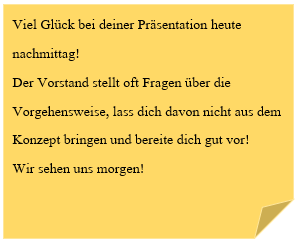



<b>Aufgabe:</b>

Lese die Verkaufszahlen ein und führe eine explorative Datenanalyse durch. 

**Hinweis:** Order date = Lieferdatum (ihr liefert noch andem Tag an dem die Bestellung eingegangen ist)

<b><font color='green'>Tip 1: Andere standen schon einmal vor demselben Problem wie du. Erkenne dein Thema/Problem und frage andere nach der Lösung. Je genauer du dein Thema kennst, desto eher kannst du die richtige Frage stellen.</font></b>


<b><font color='green'>Tip 2: der Datentyp datetime kann beim Import mitgegeben werden. Es existiert auch die Funktion to_datetime()</font></b>

# Bibs importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Datensätze einlesen und verbinden

In [2]:
files_list = os.listdir(path=".") 
files_list= files_list[3:-1]
len(files_list)

12

In [3]:
# einen Blick auf Januar

df_june = pd.read_csv('Sales_June_2019.csv')
print('Die Größe von Datensatz = ',df_june.shape)
df_june.head()

Die Größe von Datensatz =  (13622, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [4]:
# Es ist langweilig, alle 12 Dateien manuell zu verbinden, also machen wir es in einer Schleife. 
#Zum Glück haben alle Dateien die gleiche Struktur

df = pd.concat([pd.read_csv(f) for f in files_list])
df.reset_index(inplace=True)

In [5]:
df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Größe, Datentyp, Anzahl der Einzelwerte,  Null-Werte und Synonyme

In [6]:
df.shape

(186850, 7)

In [7]:
pd.concat([df.dtypes, df.nunique(), df.isnull().sum()], axis=1).rename(columns={0:'dtypes', 1:'nunique', 2:'is_null'})

,dtypes,nunique,is_null
index,int64,25117,0
Order ID,object,178438,545
Product,object,20,545
Quantity Ordered,object,10,545
Price Each,object,24,545
Order Date,object,142396,545
Purchase Address,object,140788,545


##  Systemische Null-Werte

In [8]:
df.loc[df['Product'].isnull(),:]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,1,NaN,NaN,NaN,NaN,NaN,NaN
356,356,NaN,NaN,NaN,NaN,NaN,NaN
735,735,NaN,NaN,NaN,NaN,NaN,NaN
1433,1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,10012,NaN,NaN,NaN,NaN,NaN,NaN
185438,10274,NaN,NaN,NaN,NaN,NaN,NaN
186042,10878,NaN,NaN,NaN,NaN,NaN,NaN
186548,11384,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dropna(axis=0, inplace=True)

In [10]:
print(df.shape)
df.isnull().sum()

(186305, 7)


index               0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
df[df.duplicated(['Order ID'], keep=False)]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
18,18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
19,19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001"
30,30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
...,...,...,...,...,...,...,...
186792,11628,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301"
186803,11639,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186804,11640,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301"
186841,11677,259350,Google Phone,1,600,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016"


Diese Zeilen sind keine Duplikate, sondern eine Bestellung  mit mehr als einem Artikel.

## Prüfung auf die Synonyme

In [12]:
np.sort(df['Order ID'].unique())

array(['141234', '141235', '141236', ..., '319669', '319670', 'Order ID'],
      dtype=object)

In [13]:
df.loc[df['Order ID']=='Order ID',:]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
185164,10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
rows_to_drop = df.loc[df['Order ID']=='Order ID',:].index
len(rows_to_drop)



355

In [15]:
df.drop(index=rows_to_drop, inplace=True)

In [16]:
df.shape

(185950, 7)

## Datentypen umwandeln

In [17]:
# Order ID, Quantity Ordered,Price Each - sollen inthaltlich nicht object sein

df['Order ID'] = df['Order ID'].astype(float).astype(int)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(float).astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [18]:
df.dtypes

index                 int64
Order ID              int32
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

# Neue Spalten erstellen

## Datum : Monat, Wochen Tag, Zeit, Wochenende

In [19]:
df.head(2)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [20]:
df['Order Date'] =  pd.to_datetime(df['Order Date'])

In [21]:
df.dtypes

index                        int64
Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [22]:
df['Monat'] = df['Order Date'].dt.month
df['Wochentag'] = df['Order Date'].dt.dayofweek
df['Wochenende'] = np.where(df['Wochentag'] < 5,'nein','ja')

dayOfWeek={0:'Montag', 1:'Dienstag', 2:'Mittwoch', 3:'Donerstag', 4:'Freitag', 5:'Samstag', 6:'Sonntag'}
df['Wochentag'] = df['Wochentag'].map(dayOfWeek)

df['Uhr'] = df['Order Date'].dt.hour


## Adresse : Stadt

In [23]:
df['Stadt'] = df['Purchase Address'].str.split(',').str[1]

## Umsatz

In [24]:
df['Umsatz'] = df['Price Each'] * df['Quantity Ordered']

In [25]:
df.head(5)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monat,Wochentag,Wochenende,Uhr,Stadt,Umsatz
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Freitag,nein,8,Dallas,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Sonntag,ja,22,Boston,99.99
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Freitag,nein,14,Los Angeles,600.00
4,4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Freitag,nein,14,Los Angeles,11.99
5,5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Dienstag,nein,9,Los Angeles,11.99


# Speicherplatz optimieren

## Datentypen umwalden

In [26]:
pd.concat([df.dtypes,df.nunique()], axis=1).rename(columns={0:'dtypes',1:'nunique'})

,dtypes,nunique
index,int64,25093
Order ID,int32,178437
Product,object,19
Quantity Ordered,int32,9
Price Each,float64,17
Order Date,datetime64[ns],142395
Purchase Address,object,140787
Monat,int64,12
Wochentag,object,7
Wochenende,object,2


In [27]:
memory_before = df.memory_usage(deep=True).sum() 
memory_before

78871442

In [28]:
#  Wochentag, Wochenende, Product --> an category type anpassen

df[['Product','Wochentag','Wochenende','Stadt']] = df[['Product','Wochentag','Wochenende','Stadt']].astype('category')

# downcast
df[['Monat','Uhr']] = df[['Monat','Uhr']].apply(pd.to_numeric, downcast='integer')
df[['Price Each','Umsatz']] = df[['Price Each','Umsatz']].apply(pd.to_numeric, downcast='float')

In [29]:
df.dtypes

index                        int64
Order ID                     int32
Product                   category
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
Monat                         int8
Wochentag                 category
Wochenende                category
Uhr                           int8
Stadt                     category
Umsatz                     float32
dtype: object

In [30]:
memory_after = df.memory_usage(deep=True).sum() 
memory_after

25447714

In [31]:
reduction = (memory_before-memory_after)/memory_before *100

print(f"reduction={reduction:0.2f}%")

reduction=67.74%


## Als pickle speichern

In [32]:
df.to_pickle('my_pickle')

# EDA

In [33]:
df = pd.read_pickle('my_pickle')
df.dtypes

index                        int64
Order ID                     int32
Product                   category
Quantity Ordered             int32
Price Each                 float32
Order Date          datetime64[ns]
Purchase Address            object
Monat                         int8
Wochentag                 category
Wochenende                category
Uhr                           int8
Stadt                     category
Umsatz                     float32
dtype: object

In [34]:
df.head(5)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Monat,Wochentag,Wochenende,Uhr,Stadt,Umsatz
0,0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Freitag,nein,8,Dallas,23.900000
2,2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Sonntag,ja,22,Boston,99.989998
3,3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Freitag,nein,14,Los Angeles,600.000000
4,4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Freitag,nein,14,Los Angeles,11.990000
5,5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Dienstag,nein,9,Los Angeles,11.990000


## Price, Umsatz

### Ausreißer, Verteilung

In [35]:
df['Price Each'].describe()

count    185950.000000
mean        184.319489
std         332.795868
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64

<AxesSubplot:>

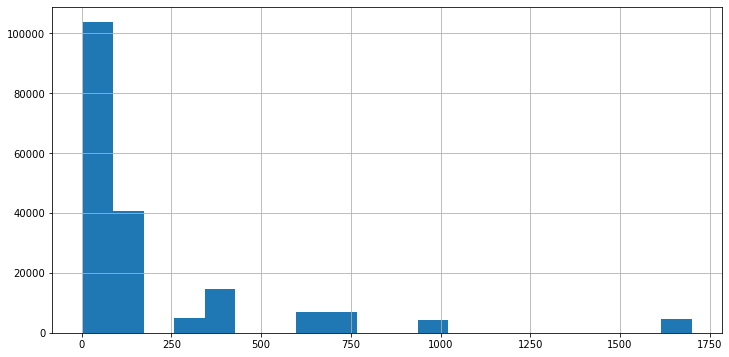

In [36]:
df['Price Each'].hist(bins=20, figsize=(12,6))

<AxesSubplot:>

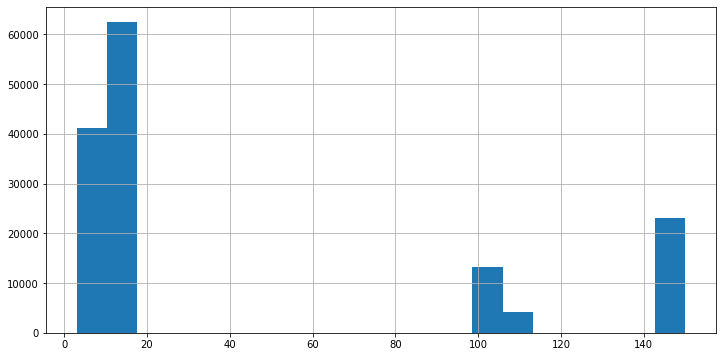

In [37]:
df.loc[df['Price Each'] < 250, 'Price Each'].hist(bins=20, figsize=(12,6))

In [38]:
# Einen Blick auf Ausreisser

df.loc[df['Price Each'] > 1500,'Product'].unique()

['Macbook Pro Laptop']
Categories (19, object): ['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', ..., 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']

**'Macbook Pro Laptop' - kann mehr als $1500 kosten.** --> beibehalten

## Welche Art von Produkt bringt uns den höchsten Umsatz?

In [39]:
pd.options.display.float_format ='{:,.3f}'.format

df_waren = df.groupby('Product', as_index=False).agg(Anzahl_der_Waren=('Quantity Ordered','sum'), Umsatz=('Umsatz','sum'))


In [40]:
df_waren['Umsatz'].min(), df_waren['Umsatz'].max()

(92740.828125, 8037600.0)

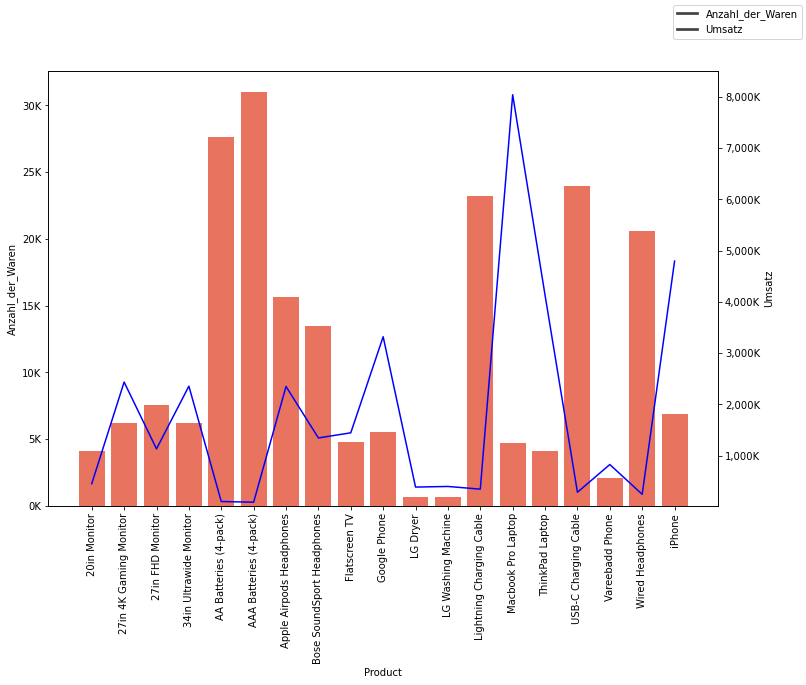

In [41]:
import warnings
warnings.filterwarnings("ignore")

fig, ax_anzahl = plt.subplots(figsize=(12,8))

g1 = sns.barplot(data=df_waren,x='Product', y='Anzahl_der_Waren', color='tomato', ax=ax_anzahl)
ax_umzatz = ax_anzahl.twinx()
g2 = sns.lineplot(data=df_waren,x='Product', y='Umsatz', color='blue', ax=ax_umzatz)

ax_anzahl.tick_params(axis='x', rotation=90)

ylabe_anzahl = ['{:,.0f}'.format(x) + 'K' for x in g1.get_yticks()/1000]
ax_anzahl.set_yticklabels(ylabe_anzahl)
ax_umzatz.set(ylim = (20000,8500000)) 
ylabel_umsatz = ['{:,.0f}'.format(x) + 'K' for x in g2.get_yticks()/1000]
g2.set_yticklabels(ylabel_umsatz)

fig.legend(labels=['Anzahl_der_Waren','Umsatz'],loc=1)

plt.show()
